In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
X=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values
# from the x[input(independant var )] get rows and only th 3rd and 4th one since conting starts at zero 
# from y[input(dependant var)] get all rows and only the forth col 

# split the data set

In [4]:
from sklearn.model_selection import train_test_split #split the data set into train and test the train to train on it an the test to try your code
#this is becaues if we use the same numbers then thi data is going to get the accurte predections but only on those lines and we wont know since we tested on the train 
#data set[there was no point to do regression if so]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)# we get the return of our split on four vars since it returns four var
# and specify the size of the test to be 0.25 which means 1/4 of the whole data set and set the strategy to randome =0


# feature scaling

### feature scaling also known has two methods 1- standarization 2- normalization

In [5]:
from sklearn.preprocessing import StandardScaler# import the standard scaler calss from our preprocessing librarry

In [6]:
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)# fit and transform the train data
X_test=sc_x.transform(X_test)# only transform the tested data since they are already fited in the train

In [7]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)# p=2 means we are using eucledian distance
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
y_pred=classifier.predict(X_test)

In [10]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
cm=confusion_matrix(y_test,y_pred)# we want to know how many right and wrong predictions so we compare the truth with what we got

In [13]:
print(cm)

[[64  4]
 [ 3 29]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


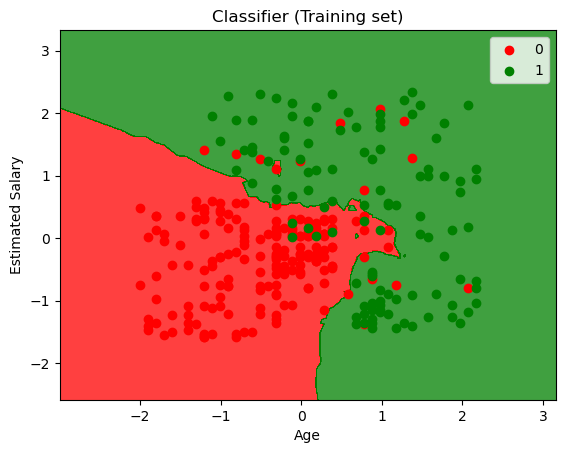

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



In [15]:
from sklearn.metrics import accuracy_score,classification_report
acc=accuracy_score(y_test,y_pred)

In [16]:
acc

0.93